# Integration and differentiation in Python

In [ ]:
# PHZ3150 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Calculating the integral $\int_a^b f(x)$


- Done it by hand couple of times

   - $\int x dx $ = ?
   - $ \int cos x dx $ = ?


- How would you code it though?

[]

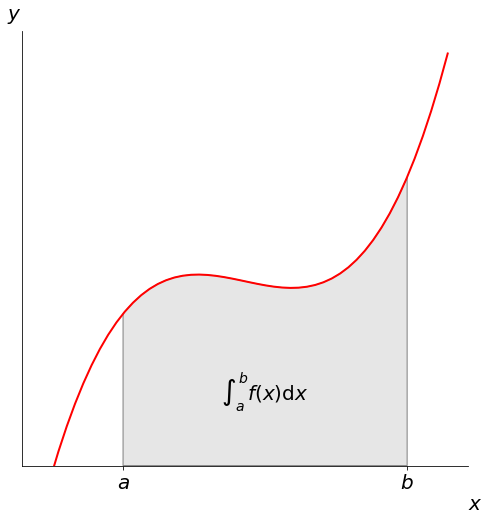

In [2]:
from matplotlib.patches import Polygon

# https://matplotlib.org/3.1.1/gallery/showcase/integral.html#sphx-glr-gallery-showcase-integral-py

def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x, y, 'r', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

ax.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
        horizontalalignment='center', fontsize=20)

fig.text(0.9, 0.05, '$x$', fontsize =20)
fig.text(0.1, 0.9, '$y$', fontsize =20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'), fontsize =20)
ax.set_yticks([])


### A 'brute force' kind of numerical integration can be done, if the integrand is reasonably well-behaved, by evaluating the integrand with very small increments.

<img src="integrate_2.png" width=550 height=250 />

### Let's try to integrate the function $y = 4*x$ from 0 to 1, i.e., $\int_0^1 4*x dx $


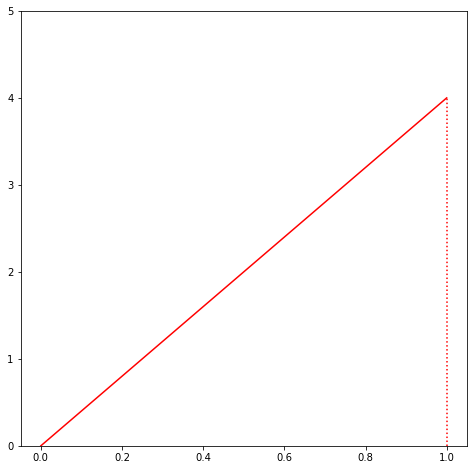

In [7]:
# Let's visualize the function first:
a = 4

x = np.linspace(0,1.00001,20000)

y = a * x

plt.figure(figsize=(8,8))
plt.plot(x,y,color='red')
plt.plot(np.ones(len(np.linspace(0,4,10))),np.linspace(0,4,10),color='red', linestyle = ':')
plt.ylim(0.,5)
plt.show()


### OK, so we are looking for a triangle's surface: from basic math the surface of the triangle is ....

In [4]:


sum_int = 

print('Surface of triangle: ', sum_int )



Surface of triangle:  2.0000400002000003


### What if we split it in N blocks of width (x[i]-x[i-2]/2) and height y[i] and do the summation $\Sigma_i y[i] * dx[i]$:

In [9]:
sum_int = 0                      #set the  value of your sum (integral) to zero

for i in range( len( x ) - 1 ):  #scan array x 
    d = x[ i+1 ] - x[ i ]        # for every step get the base of your block 
    h = a * (x[ i ] + d /2)        # calculate the height of your block (i.e., where your function is) 
    sum_int += d * h             #calculate surface of block and add to integral valus
    
print('Integration:', sum_int)

Integration: 2.0000400002


### Does it make sense? 

### From math we know that $\int_0^1 4*x dx $ = $2 * x^2 |^1_0$  = 2 - 0 = 2 ...yes! it worked (kinda)

### Why is there this small discrepancy?

### What if you have a more complex function? E.g., let's try to integrate $ \int_0^1 2*x^2 $ dx

(0.0, 2.5)

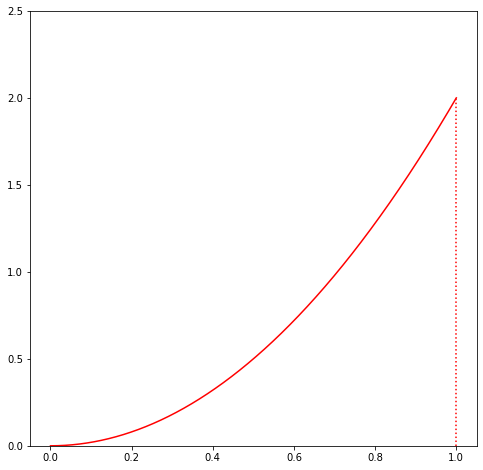

In [10]:
# first we visualize it:
a = 2

x = np.linspace(0,1.00001,20000)

y = a* x**2

plt.figure(figsize=(8,8))
plt.plot(x,y,color='red')
plt.plot(np.ones(len(np.linspace(0,2,10))),np.linspace(0,2,10),color='red', linestyle = ':')
plt.ylim(0.,2.5)



### let's split it in N blocks of width (x[ i ] - x[ i - 1 ] ) and height y[ i ]:


In [11]:

sum_int = 0                      #set the  value of your integral to zero

for i in range(len( x ) - 1 ):   #scan array x 
    d = x[ i + 1 ] - x[ i ]      # for every step get the base of your block 
    h =               # calculate the height of your block (i.e., where your function is) 
    sum_int += d * h             #calculate surface of block and add to integral valus
#or    sum_int = sum_int + d*h

print( sum_int )

0.666686666449942


### Does it make sense again? $\int_0^1 2* x^2 dx = \frac{2}{3} x^3 |^1_ 0 = \frac{2}{3}$ check!  

### Can you do the integration of $\int_0^{1} |2*sin(2 * \pi * x)| dx$ ?

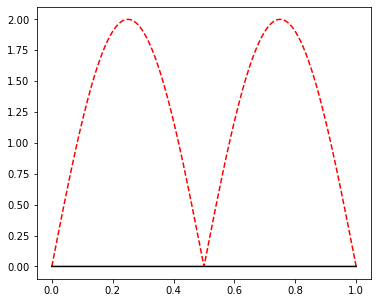

In [16]:
x = np.linspace(0,1.00001,20000)

y = 2 * np.sin( 2 * np.pi * x )

#First practice plt.plot and visualize the function:
plt.figure( figsize= (6, 5) )

plt.plot( x, np.abs(y), color = 'red', linestyle = '--' )
plt.plot( x, np.zeros(len(x)) , color = 'black')


In [18]:
#let's split it in N blocks of width dx[i] and height y[i]:

sum_int = 0                      #set the  value of your integral to zero

for i in range(len( x ) - 1 ):   #scan array x 
    d = x[ i + 1 ] - x[ i ]      # for every step get the base of your block 
    h =     # calculate the height of your block (i.e., where your function is) 
    sum_int += d * h             #calculate surface of block and add to integral valus
#or    sum_int = sum_int + d*h

print( sum_int )

1.2732395443161577


### again, does it make sense? 

### Python offers a built-in way to check it out:

In [19]:
from scipy.integrate import quad

### see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

In [20]:
def integrand(x, a):
     return a * np.abs( np.sin( 2 * np.pi * x ) )
    
I = quad( integrand, 0, 1.0001, args = ( 2, ) )
print( I )

(1.2732394504873854, 1.4099832412739488e-14)


In [21]:
#what does scipy say that the real integral is for the previous function? 
def integrand(x, a):
     return a * x**2 


I = quad(integrand, 0, 1.0001, args = ( 2, ) )
print( I )

(0.6668666866673333, 7.403707498935633e-15)


### Integrate : $\int_{3.5}^{7.5} |4 - (x - 5.5)^2| dx $ , aka, the surface under this semi-circle:

(0.0, 3.0)

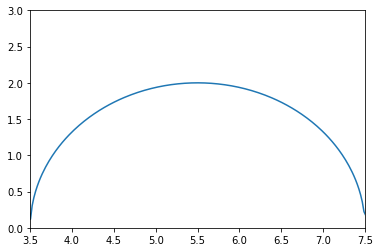

In [22]:
x = np.linspace(0,20,1000)
plt.plot( x , np.sqrt( np.abs(4 - (x- 5.5)**2 ) ) )
plt.xlim( 3.5, 7.5)
plt.ylim(0.,3)

In [23]:
#integrate here manually:

sum_int = 0                      #set the  value of your integral to zero

x2 = x[ (x >= 3.5 ) & (x <= 7.5 )]

for i in range(len( x2 ) - 1 ):   #scan array x 
    d = x2[ i + 1 ] - x2[ i ]      # for every step get the base of your block 
    h =     # calculate the height of your block (i.e., where your function is) 
    sum_int += d * h             #calculate surface of block and add to integral valus
#or    sum_int = sum_int + d*h

print( sum_int )

6.281414541621191


In [25]:
len(x2)

200

In [24]:
#use quad():

def integrand(x ):
     return np.sqrt( np.abs(4 - ( x  - 5.5)**2 ) ) 


I = quad(integrand, 3.5, 7.5001 )
print( I )

(6.2831866437674275, 1.3450426550321026e-08)


# Differentiation



- have done it multiple times by hand
    - $\frac{dx^2}{dx}$ = ?
    - $\frac{de^x}{dx}$ = ?
    
- how do you put it in code though?

### For simple functions in a program you can approximate differential changes in a quantity with $\frac{\Delta y}{\Delta x }$. Generally though this is prone to numerical error and, if you'have complex functions of more than one params/functions, can take a while


### Let's test it out with $f(x) = 2* x^2 $

In [26]:
#make x with many small intervals:
x = np.linspace( 0, 1, 1000 )
y = 2 * x**2


In [27]:
# calculate the approximate derivative of 2*x^2 at every x:

dydx = np.zeros( len( x ) )

for i in range( 1, len( x ) ):
    dydx[ i ] = ( y[ i ] - y[ i - 1 ] ) / ( x[ i ] - x[ i - 1 ] )

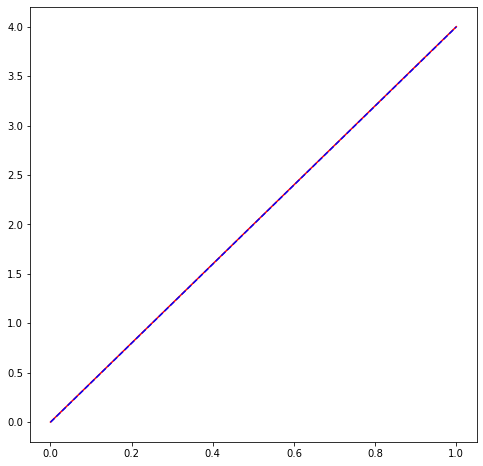

In [28]:
# plot the derivative (straight and what we just calculated):

plt.figure( figsize = ( 8 , 8 ) )
plt.plot(x, 4 * x     ,color='red')   #do the differentiation
plt.plot(x, dydx ,color='blue',linestyle='--')  #check what dydx did


### np.diff() calculates the discrete difference of your function along a given axis; so you can get the Dy/Dx

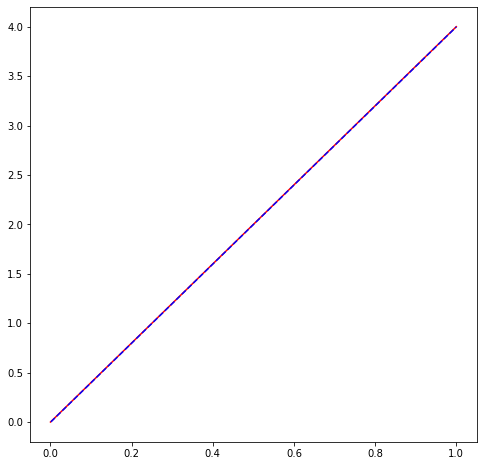

In [31]:
plt.figure( figsize = ( 8 , 8 ) )
plt.plot( x, 4 * x     ,color='red')   #do the differentiation
plt.plot( x[ 1: ], np.diff( y ) / np.diff( x ) ,color='blue',linestyle='--')  #check what np.diff did
 

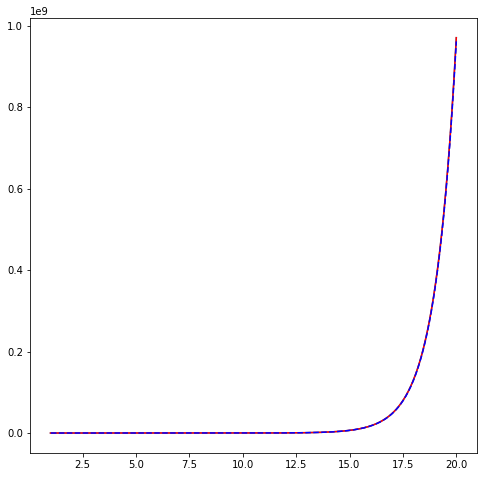

In [32]:
x = np.linspace(1, 20, 1000 )
y = 2 * np.exp( x )
z = np.diff( y ) / np.diff( x )

plt.figure(figsize = ( 8, 8 ) )

plt.plot( x, y )               # get the real function
plt.plot( x, y, color='red')   #do the manual differentiation --> it's the same...
plt.plot( x[ 1 : ], z, color = 'blue', linestyle = '--')  #check what np.diff did


### You can also use numpy's gradient() ; https://numpy.org/doc/stable/reference/generated/numpy.gradient.html

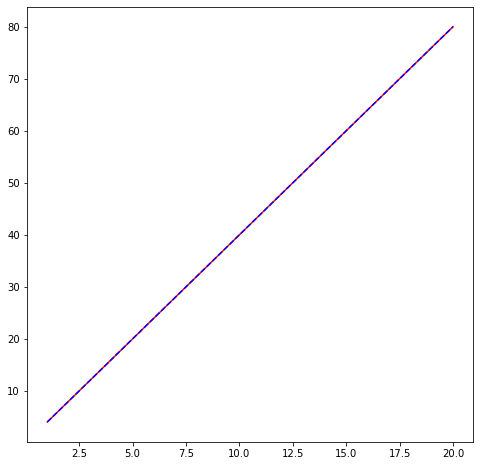

In [33]:
x = np.linspace( 1, 20, 1000 )
y = 2 * x**2
xx = x[ 1 ] - x[ 0 ]

a = np.gradient( y , xx )

plt.figure(figsize = ( 8, 8 ) )

plt.plot( x, 4 * x, color = 'red' )   #do the manual differentiation --> it's the same...
plt.plot( x, a    , color = 'blue', linestyle = '--')  #check what np.diff did


### Let's do a more complex function: $\sin x$

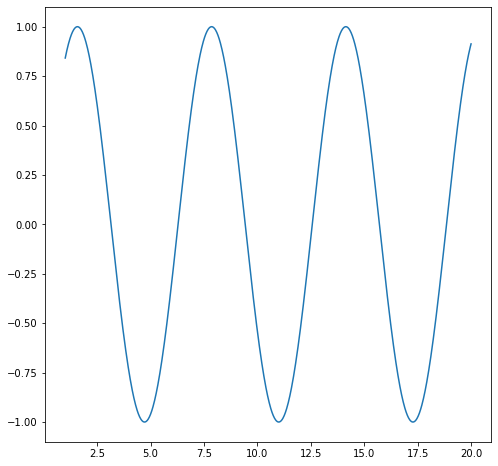

In [34]:
x = np.linspace( 1, 20, 1000 )
y = np.sin( x )

plt.figure( figsize = ( 8, 8 ) )

plt.plot( x , y )                           # plot the function


### what is the $ \frac{d \sin x}{dx} $ ?

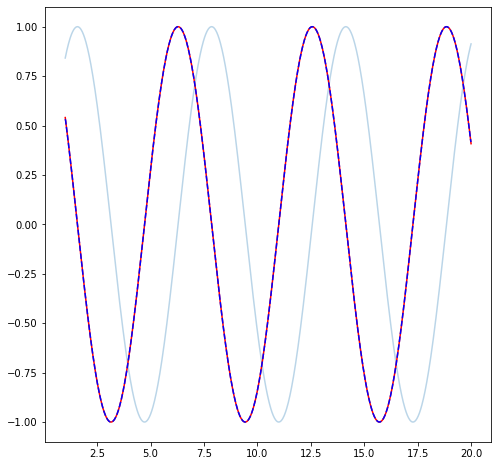

In [38]:
xx = x[ 1 ] - x[ 0 ]
z = np.gradient( y , xx )

plt.figure( figsize = ( 8, 8 ) )

plt.plot( x , y , alpha = 0.3)                                # plot the function
plt.plot( x, np.cos( x ) ,color='red')                         # plot the manual differentiation 
plt.plot( x, z , color = 'blue', linestyle='--') # plot the x, z


### What about an even more complex equation like $\log_{10}x$


In [39]:
f = np.log10( x )

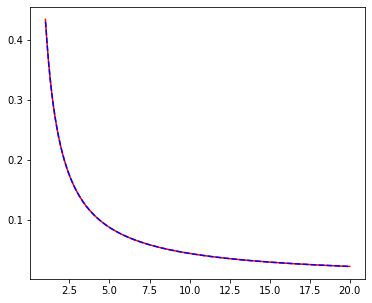

In [44]:
# plot the differential here:

xx = x[ 1 ] - x[ 0 ]
z2 = np.gradient( f , xx )

plt.figure( figsize = ( 6, 5 ) )

#plt.plot( x , f , alpha = 0.3)                                # plot the function
plt.plot( x, 1/(x * np.log(10))  ,color='red')                         # plot the manual differentiation 
plt.plot( x, z2 , color = 'blue', linestyle='--') # plot the x, z



### fun/ useful gadget:  https://www.sympy.org/en/index.html


In [45]:
import sympy as sym


In [46]:
x1 = sym.Symbol( 'X1' )
sym.diff( 5 * x1**3 )

15*X1**2

In [47]:
sym.diff( (x1**2 + 1) * sym.cos( x1 ) )

2*X1*cos(X1) - (X1**2 + 1)*sin(X1)

In [48]:
sym.diff( 2 * sym.exp( x1 ) )

2*exp(X1)

### OK, we now know how to do it, but where would we ever use it really?

### Some basic Physics examples:

### We have already seen an example earlier in this class, any ideas?



In [50]:

x_u = np.linspace( 1, 20, 100 )
t_u = np.arange( 100 )

# u = dx/dt:
tt = t_u[ 1 ] - t_u[ 0 ]
u = np.gradient( x_u , tt  )


dydx = np.zeros( len( x_u ) )

for i in range( 1, len( x_u ) ):
    dydx[ i ] = ( x_u[ i ] - x_u[ i - 1 ] ) / ( t_u[ i ] - t_u[ i - 1 ] )


(0.0, 0.5)

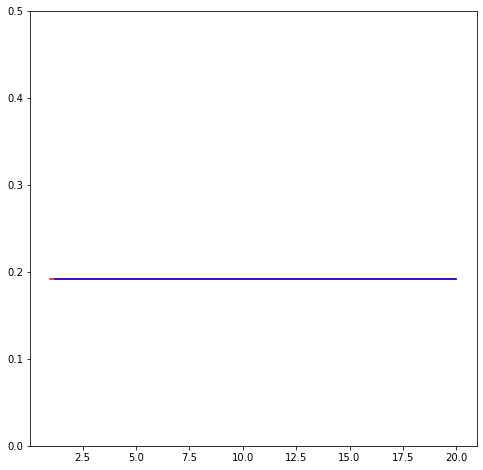

In [51]:
plt.figure( figsize = ( 8,8 ) )

plt.plot( x_u, u    , color = 'red' )
plt.plot( x_u[ 1 : ], dydx[ 1: ] , color = 'blue' )
plt.ylim( 0., .5)

In [52]:
# a = du/dt:

a = np.gradient( u , tt  )


dydx2 = np.zeros( len( x_u ) )

for i in range( 1, len( x_u ) ):
    dydx2[ i ] = ( u[ i ] - u[ i - 1 ] ) / ( t_u[ i ] - t_u[ i - 1 ] )


(-0.5, 0.5)

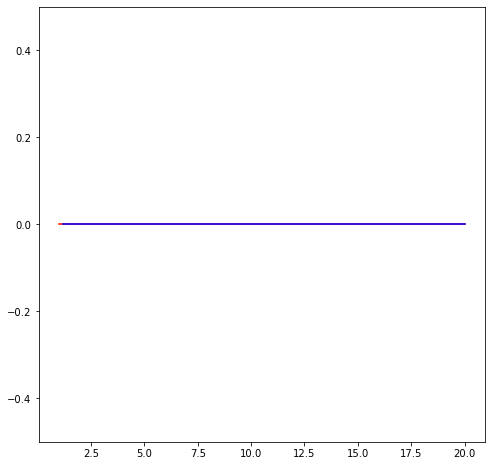

In [53]:
plt.figure( figsize = ( 8,8 ) )

plt.plot( x_u, a    , color = 'red' )
plt.plot( x_u[ 1 : ], dydx2[ 1: ] , color = 'blue' )
plt.ylim( -.5, .5)

In [54]:
t_u = np.arange( 100 )
dx = np.array( [0.0000e+00 , 2.0000e+00 , 8.0000e+00,  1.8000e+01,  3.2000e+01 , 5.0000e+01, 
 7.2000e+01, 9.8000e+01, 1.2800e+02, 1.6200e+02, 2.0000e+02, 2.4200e+02,
 2.8800e+02, 3.3800e+02, 3.9200e+02, 4.5000e+02, 5.1200e+02, 5.7800e+02,
 6.4800e+02, 7.2200e+02, 8.0000e+02, 8.8200e+02, 9.6800e+02, 1.0580e+03,
 1.1520e+03, 1.2500e+03, 1.3520e+03, 1.4580e+03, 1.5680e+03, 1.6820e+03,
 1.8000e+03, 1.9220e+03, 2.0480e+03, 2.1780e+03, 2.3120e+03, 2.4500e+03,
 2.5920e+03, 2.7380e+03, 2.8880e+03, 3.0420e+03, 3.2000e+03, 3.3620e+03,
 3.5280e+03, 3.6980e+03, 3.8720e+03, 4.0500e+03, 4.2320e+03, 4.4180e+03,
 4.6080e+03, 4.8020e+03, 5.0000e+03, 5.2020e+03, 5.4080e+03, 5.6180e+03,
 5.8320e+03, 6.0500e+03, 6.2720e+03, 6.4980e+03, 6.7280e+03, 6.9620e+03,
 7.2000e+03, 7.4420e+03, 7.6880e+03, 7.9380e+03, 8.1920e+03, 8.4500e+03,
 8.7120e+03, 8.9780e+03, 9.2480e+03, 9.5220e+03, 9.8000e+03, 1.0082e+04,
 1.0368e+04, 1.0658e+04, 1.0952e+04, 1.1250e+04, 1.1552e+04, 1.1858e+04,
 1.2168e+04, 1.2482e+04, 1.2800e+04, 1.3122e+04, 1.3448e+04, 1.3778e+04,
 1.4112e+04, 1.4450e+04, 1.4792e+04, 1.5138e+04, 1.5488e+04, 1.5842e+04,
 1.6200e+04, 1.6562e+04, 1.6928e+04, 1.7298e+04, 1.7672e+04, 1.8050e+04,
 1.8432e+04, 1.8818e+04, 1.9208e+04, 1.9602e+04 ] )

In [1]:
# what is the acceleration of this car?

# u = dx/dt:



# a = du/dt:



In [ ]:
# true acceleration : 4 

### Read in the data from ***body_motion.data***. Can you guess which kind of motion this is?

In [57]:
# read data:
motion_body = 

In [58]:
#assign it to t and x:


In [2]:
#plot dataset:


In [3]:
# what is the speed and acceleration of this object?


In [ ]:
### reminds you of something?


In [ ]:
# calculate acceleration, speed, distance .....what do they do..what is this motion?

### Assume sphere with radius R = 1,000 m and density $\rho (r) = \rho_0 (1 - \alpha \frac{r}{R}) $, where $\rho_0, \alpha$ are constants. What is the total mass of the sphere if you know that: $M_{tot} = \int_0^{2\pi} \int_0^{\pi} \int_0^R \rho(r) r^2 \sin \phi dr d\phi d\theta $ ?

You can assume $R$ = 8.913e7 m , $\alpha = 1.13$ and $\rho_0$ = 5320 kg/m3


### How are you going to solve this? How are you integrating a sphere?

In [68]:
rho0 = 5320
alpha    = 1.13
R0   = 8.913e7

In [69]:
## try it at a lower res: faster/less accurate though

r = np.arange( 0, R0, 1e4 )
theta = np.arange( 0, 1, 0.05 ) * 2* np.pi
phi = np.arange( 0, 1, 0.05 ) * np.pi


In [70]:
#calculate the total mass:

###  A mass of 0.2kg is hanging from the end of a spring with a constant k=3.5 N/m. You let the mass go, and the mass-spring system starts oscillating.  Assume that x0 = 0 [m], u0 = 0 [m/s]. Remember that g = 9.8 [m/s2], and that the force applied on the mass by the gravity-spring system is F = −mg - kx . 

### Your goal: Plot the oscillation of the mass over time t=np.linespace(0,4,100). 

### To do this, create a function oscillation(x0,t0,u0,k,m,g,t) that takes as input the initial position x0 of the object at time t0, its initial speed u0, the parameters k, m and g and the time at which you want to calculate the location of the mass t, and returns the corresponding location of the object x. 

### Tip 1: remember that F=m * a=m $\frac{d^2x}{d^2t}$.  
### Tip 2: to make the problem more tractable you can split the second order derivative into two first order differences ( $\frac{\Delta x}{\Delta t}$  and $\frac{\Delta u}{\Delta t}$ ).

